In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import auc

In [2]:
x = np.arange(0, 1, 0.01)

In [3]:
def gaussian(mean,sig,x):
    ex=np.exp(-np.power((x-mean),2)/(2*np.power(sig,2)))
    return ex/(sig*np.power(2*3.14,0.5))

In [4]:
normal = gaussian(0.4, 0.1, x)
disease = gaussian(0.6, 0.1, x)

In [5]:
def pdf_plot(normal, disease, ax):
    ax.plot(x, normal, label='Normal')
    ax.plot(x, disease, label='Disease')
    # plt.fill_between(x_values, normal_gaussian_curve,x_values)

    ax.set_xlabel('x value')
    ax.set_ylabel('mean')
    ax.set_title('Probability Distribution')

In [6]:
def roc_plot(normal_gc,disease_gc,ax):
    total_disease=np.sum(disease_gc)
    totoal_normal=np.sum(normal_gc)
    cumulative_tp=0
    cumulative_fp=0
    tpr_array=[]
    fpr_array=[]
    for counter in range(len(x)):
        if disease_gc[counter]>0:
            cumulative_tp+=disease_gc[len(x)-1-counter]
            cumulative_fp+=normal_gc[len(x)-1-counter]
            fpr_counter =cumulative_fp/totoal_normal
            tpr_counter=cumulative_tp/total_disease
            tpr_array.append(tpr_counter)
            fpr_array.append(fpr_counter)
    area_under_roc=auc(fpr_array,tpr_array)
    # preparing the plot of roc acurve
    ax.plot(fpr_array,tpr_array)
    ax.plot(x,x,"--")
    ax.set_xlim([0,1])
    ax.set_ylim([0,1])
    ax.set_title("roc curve", fontsize=16)
    ax.set_ylabel("tru positive rate", fontsize=14)
    ax.set_xlabel("fals positive rate", fontsize=14)
    ax.grid()
    ax.legend(["Area under curve =%.3f" % area_under_roc])   
            

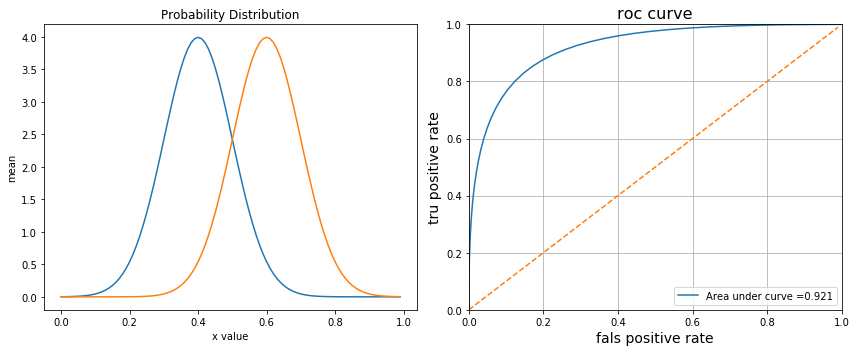

In [7]:
fig,axis=plt.subplots(1,2,figsize=(12,5))
pdf_plot(normal, disease, axis[0])
roc_plot(normal, disease, axis[1])
plt.tight_layout()

In [8]:
from sklearn.metrics import mean_squared_error
import sklearn.linear_model as skl_ln
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import KFold


In [13]:
data_frame_car=pd.read_csv('cars.csv')
print(data_frame_car.head())

    mpg  cylinders  displacement  horsepower  weight  acceleration  \
0  18.0          8         307.0         130    3504          12.0   
1  15.0          8         350.0         165    3693          11.5   
2  18.0          8         318.0         150    3436          11.0   
3  16.0          8         304.0         150    3433          12.0   
4  17.0          8         302.0         140    3449          10.5   

   model year  origin                   car name  
0          70       1  chevrolet chevelle malibu  
1          70       1          buick skylark 320  
2          70       1         plymouth satellite  
3          70       1              amc rebel sst  
4          70       1                ford torino  


In [14]:
train_data_fram_car=data_frame_car.sample(196,random_state=1).dropna(how='all')
test_data_frame_car=data_frame_car[~data_frame_car.isin(train_data_fram_car)].dropna(how='all')
print(train_data_fram_car.head())
print(test_data_frame_car.head())
train_data=train_data_fram_car['horsepower'].values.reshape(-1, 1)
train_data_label=train_data_fram_car['mpg']
test_data=test_data_frame_car['horsepower'].values.reshape(-1,1)
test_data_labels=test_data_frame_car['mpg']
print(train_data)


      mpg  cylinders  displacement  horsepower  weight  acceleration  \
81   23.0          4         120.0          97    2506          14.5   
165  29.0          4          97.0          75    2171          16.0   
351  32.4          4         108.0          75    2350          16.8   
119  19.0          4         121.0         112    2868          15.5   
379  38.0          4          91.0          67    1995          16.2   

     model year  origin                     car name  
81           72       3  toyouta corona mark ii (sw)  
165          75       3               toyota corolla  
351          81       3               toyota corolla  
119          73       2                  volvo 144ea  
379          82       3                datsun 310 gx  
     mpg  cylinders  displacement  horsepower  weight  acceleration  \
1   15.0        8.0         350.0       165.0  3693.0          11.5   
2   18.0        8.0         318.0       150.0  3436.0          11.0   
3   16.0        8.0     

In [15]:
lm=skl_ln.LinearRegression()
model=lm.fit(train_data,train_data_label)
prd=model.predict(test_data)
msk=mean_squared_error(test_data_labels,prd)
print("the msk due to linear term ="+str(msk))


the msk due to linear term =23.361902892587224


In [16]:
for i in range(1,10,1):
    poly_quadratic=PolynomialFeatures(degree=i+1)
    train_data_quadratic=poly_quadratic.fit_transform(train_data)
    test_data_quadratic=poly_quadratic.fit_transform(test_data)
    model = lm.fit(train_data_quadratic,train_data_label)
    print("the mse due to quadratic term="+str(mean_squared_error(test_data_labels,model.predict(test_data_quadratic))))


the mse due to quadratic term=20.252690858346565
the mse due to quadratic term=20.325609365972443
the mse due to quadratic term=20.343887107715936
the mse due to quadratic term=20.03643093580982
the mse due to quadratic term=19.955164905494623
the mse due to quadratic term=20.186324190226347
the mse due to quadratic term=20.3570859471662
the mse due to quadratic term=20.26745475168885
the mse due to quadratic term=20.104916386190077
